In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Cài đặt thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
#Đọc dữ liệu từ file CSV
df = pd.read_csv("/content/drive/MyDrive/HHTQĐ/data_mau.csv")

In [6]:
df

,Loại cây trồng,Nhiệt độ (°C),Lượng mưa (mm),Độ ẩm (%),Loại đất,Lượng phân bón (kg/ha),Kỹ thuật canh tác,Năng suất dự báo (tấn/ha)
0,Cà phê,22.36,79.22,79.83,Thịt,89.26,Truyền thống,16.81
1,Sắn,24.63,284.96,64.08,Cát,87.05,Truyền thống,19.05
2,Đậu tương,36.28,206.93,45.87,Cát,185.94,Truyền thống,27.52
3,Cà phê,22.92,133.73,46.26,Cát,87.43,Truyền thống,15.32
4,Khoai,19.24,84.82,74.28,Cát,90.79,Công nghệ cao,15.85
...,...,...,...,...,...,...,...,...
495,Cà phê,37.49,206.56,64.07,Phù sa,123.85,Truyền thống,22.59
496,Khoai,24.60,82.81,40.96,Phù sa,136.59,Truyền thống,19.19
497,Sắn,28.59,58.13,52.99,Sét,179.84,Công nghệ cao,23.72
498,Lúa,37.66,280.21,78.01,Sét,197.11,Công nghệ cao,31.84


In [7]:
#Kiểm tra các giá trị null
df.isna()

,Loại cây trồng,Nhiệt độ (°C),Lượng mưa (mm),Độ ẩm (%),Loại đất,Lượng phân bón (kg/ha),Kỹ thuật canh tác,Năng suất dự báo (tấn/ha)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


<Axes: >

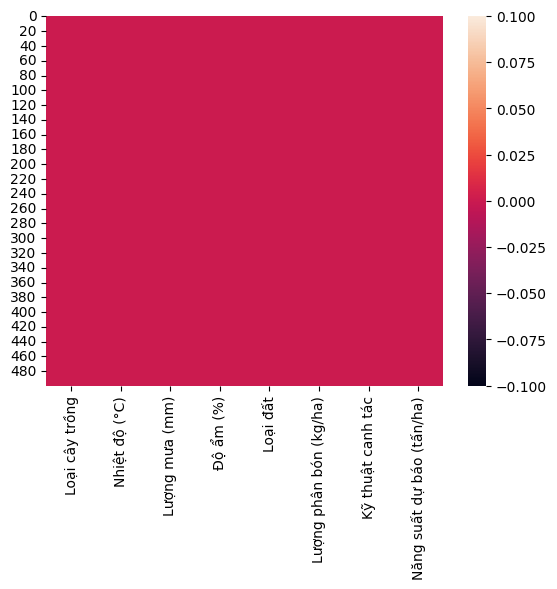

In [8]:
import seaborn as sb
sb.heatmap(df.isnull())

In [9]:
# Tách dữ liệu thành biến đầu vào (X) và biến mục tiêu (y)
X = df.drop(columns=["Năng suất dự báo (tấn/ha)"])
y = df["Năng suất dự báo (tấn/ha)"]

In [10]:
# Xử lý biến danh mục bằng One-Hot Encoding
categorical_cols = ["Loại cây trồng", "Loại đất", "Kỹ thuật canh tác"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)


In [11]:
# Kết hợp với các biến số
X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_processed = pd.concat([X_numeric, X_encoded], axis=1)

In [12]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

In [13]:
# In ra dữ liệu sau khi chuẩn hóa
print("Dữ liệu sau khi chuẩn hóa:")
print(pd.DataFrame(X_scaled, columns=X_processed.columns).head())

Dữ liệu sau khi chuẩn hóa:
   Nhiệt độ (°C)  Lượng mưa (mm)  Độ ẩm (%)  Lượng phân bón (kg/ha)  \
0      -0.691857       -1.324042   1.051344               -0.833947   
1      -0.381441        1.461114  -0.038518               -0.885548   
2       1.211667        0.404802  -1.298606                1.423425   
3      -0.615279       -0.586126  -1.271619               -0.876675   
4      -1.118509       -1.248234   0.667297               -0.798223   

   Loại cây trồng_Hồ tiêu  Loại cây trồng_Khoai  Loại cây trồng_Lúa  \
0               -0.410152             -0.383131           -0.406818   
1               -0.410152             -0.383131           -0.406818   
2               -0.410152             -0.383131           -0.406818   
3               -0.410152             -0.383131           -0.406818   
4               -0.410152              2.610077           -0.406818   

   Loại cây trồng_Mía  Loại cây trồng_Ngô  Loại cây trồng_Sắn  \
0           -0.376235           -0.318311           -0

In [14]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)


In [17]:
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [18]:
# In kết quả đánh giá
print(f"\nLỗi tuyệt đối trung bình (MAE): {mae:.3f}")
print(f"Lỗi bình phương trung bình (MSE): {mse:.3f}")
print(f"Lỗi căn bậc hai bình phương trung bình (RMSE): {rmse:.3f}")


Lỗi tuyệt đối trung bình (MAE): 0.387
Lỗi bình phương trung bình (MSE): 0.237
Lỗi căn bậc hai bình phương trung bình (RMSE): 0.487
